<a href="https://colab.research.google.com/github/dins2k2/AIStuffs/blob/main/DeepLearning_PyTorch_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Simple Linear Regression**

### Import libs

In [ ]:
import torch
from torch import nn
from matplotlib import pyplot as plt

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### Prepare data to load into the model

In [ ]:
w = 0.7 # weight
b = 0.3 # bias

start = 0
end = 1
step = .02

X = torch.arange(start, end, step).unsqueeze(dim=1)

y = w * X + b #  linear regression formula (y = mX + b) to make a straight line with known parameters.

X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

### Splitting data into training and test sets

In [ ]:
data_split = int(0.8 * len(X))

X_train, y_train = X[:data_split], y[:data_split]
X_test, y_test = X[data_split:], y[data_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualize the train, test and predicted data with pyplot

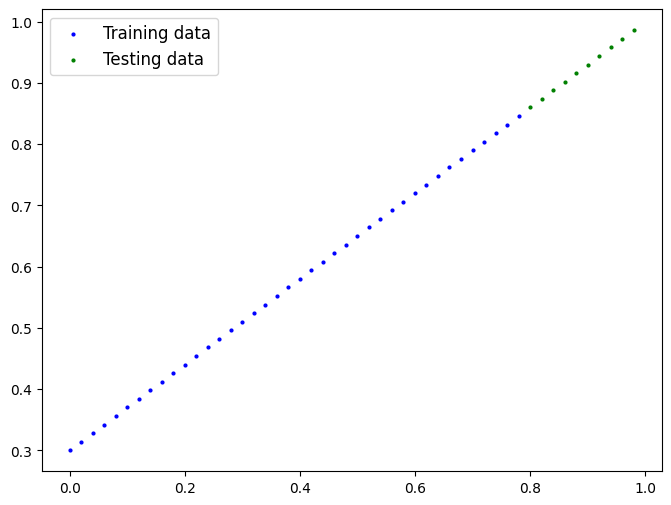

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  # Plots training data, test data and compares predictions.
  plt.figure(figsize=(8, 6))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 12})

plot_predictions()

### Build the model

In [ ]:
# Using nn.Linear class

class LinearRegressionModel(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features, out_features)

  def forward(self, x: torch.Tensor): # -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)

model1 = LinearRegressionModel(1,1) # 1 input feature and 1 output
model1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### Set model to GPU if it's availalble, otherwise it'll default to CPU

In [ ]:
model1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model1.parameters()).device

device(type='cpu')

### Training and evaluating the model

In [ ]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params = model1.parameters(), lr=0.01)

#torch.manual_seed(42)

# Set the number of epochs
epochs = 2000

# Put data on the available device
# Without this, error will happen (not all model/data on device)

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

  # Set the model in Training mode
  model1.train()

  # 1. Forward pass
  y_pred = model1(X_train)

  # 2. Calculate loss
  train_loss = loss_fn(y_pred, y_train)

  # 3. Zero grad optimizer
  optimizer.zero_grad()

  # 4. Loss backward (Backporpagation)
  train_loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  # Set the model in Evaluation (Testing) mode
  model1.eval()

  with torch.inference_mode():

    # 1. Forward pass
    test_pred = model1(X_test)

    # 2. Calulate loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 10:
    print(f'Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}')

Epoch: 10 | Train Loss: 0.004298574291169643 | Test Loss: 0.008347362279891968
Epoch: 110 | Train Loss: 0.004298574291169643 | Test Loss: 0.008347362279891968
Epoch: 210 | Train Loss: 0.004298574291169643 | Test Loss: 0.008347362279891968
Epoch: 310 | Train Loss: 0.004298574291169643 | Test Loss: 0.008347362279891968
Epoch: 410 | Train Loss: 0.004298574291169643 | Test Loss: 0.008347362279891968
Epoch: 510 | Train Loss: 0.004298574291169643 | Test Loss: 0.008347362279891968
Epoch: 610 | Train Loss: 0.004298574291169643 | Test Loss: 0.008347362279891968
Epoch: 710 | Train Loss: 0.004298574291169643 | Test Loss: 0.008347362279891968
Epoch: 810 | Train Loss: 0.004298574291169643 | Test Loss: 0.008347362279891968
Epoch: 910 | Train Loss: 0.004298574291169643 | Test Loss: 0.008347362279891968
Epoch: 1010 | Train Loss: 0.004298574291169643 | Test Loss: 0.008347362279891968
Epoch: 1110 | Train Loss: 0.004298574291169643 | Test Loss: 0.008347362279891968
Epoch: 1210 | Train Loss: 0.00429857429

OrderedDict([('linear_layer.weight', tensor([[0.6983]])), ('linear_layer.bias', tensor([0.2963]))])
data_weight=0.7, data_weight=0.3


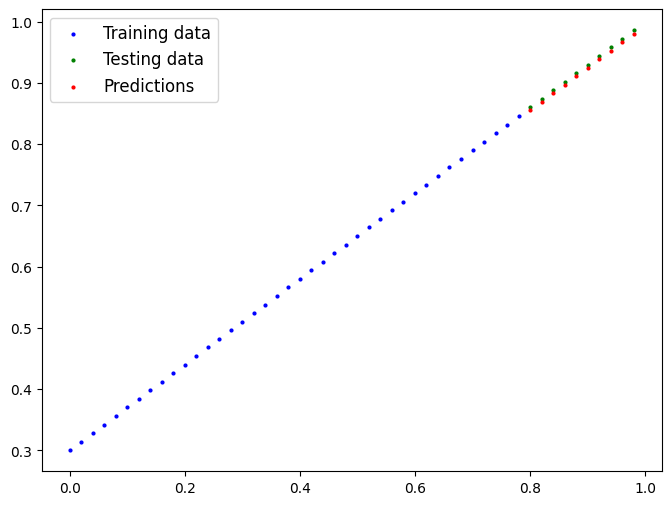

In [ ]:
plot_predictions(predictions=test_pred)
print(model1.state_dict())
print(f"data_weight={w}, data_weight={b}")

### Saving and loading a model

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_DIR = Path('models')
MODEL_DIR.mkdir(parents=True, exist_ok=True)

# 2. Create model path
MODEL_NAME = 'SimpleLinearRegressionModel1.pth'
MODEL_PATH = MODEL_DIR/MODEL_NAME

torch.save(obj=model1.state_dict(), f=MODEL_PATH)

# Instantiate a fresh instance of LinearRegressionModelV2
model2 = LinearRegressionModel()

# Load the saved model state dict
model2.load_state_dict(torch.load(MODEL_PATH))

# Put the model to device
model2.to(device)

model2, next(model2.parameters()).device

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 device(type='cpu'))

### Evaluate the saved model

In [ ]:
model2.eval()

with torch.inference_mode():
  model2_pred = model2(X_test)

test_pred == model2_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Exercise - New data to predit the output using trained(saved) model

In [ ]:
# New data
X1 = torch.arange(2,3,0.02).unsqueeze(dim=1)
y1 = w*X1+b

X1_train, y1_train = X1[:data_split], y1[:data_split]
X1_test, y1_test = X1[data_split:], y1[data_split:]

len(X1_train), len(y1_train), len(X1_test), len(y1_test)

(40, 40, 10, 10)

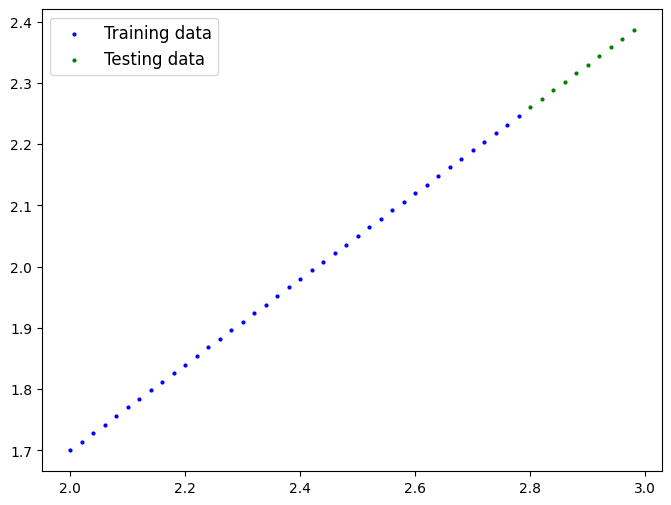

In [ ]:
plot_predictions(train_data=X1_train, train_labels=y1_train, test_data=X1_test, test_labels=y1_test)

In [ ]:
model3 = LinearRegressionModel()

# Load the saved model state dict
model3.load_state_dict(torch.load(MODEL_PATH))

# Put the model to device
model3.to(device)

model3.eval()

with torch.inference_mode():
  model3_pred = model3(X1_test)

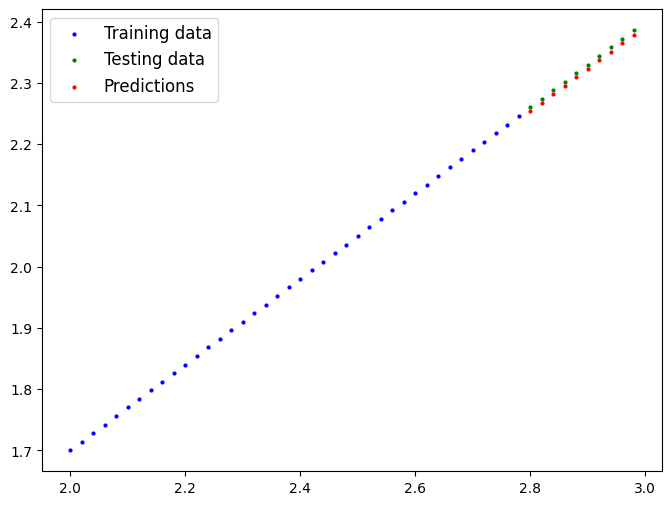

In [ ]:
plot_predictions(train_data=X1_train, train_labels=y1_train, test_data=X1_test, test_labels=y1_test, predictions=model3_pred)

## **Logistic/Binary Classification**

### Import libs

In [ ]:
!pip install -q torchmetrics
import torch
from torch import nn
import pandas as pd
from sklearn.datasets import make_circles
from torchmetrics import Accuracy

### Make classification data and get it ready

In [ ]:
# Make 2000 samples
n_samples = 2000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

print(f"First 5 X features: {X[:5]}")
print(f"First 5 y labels: {y[:5]}")

First 5 X features: [[ 0.47109875 -0.58158579]
 [-0.61696058  0.80818956]
 [-0.3999557   0.70796779]
 [ 0.82938523 -0.60057314]
 [-0.16419138  0.76128858]]
First 5 y labels: [1 0 1 0 1]


In [ ]:
circles = pd.DataFrame({'X1': X[:,0], 'X2': X[:,1], 'label': y})
circles.head(10)

,X1,X2,label
0,0.471099,-0.581586,1
1,-0.616961,0.808190,0
2,-0.399956,0.707968,1
3,0.829385,-0.600573,0
4,-0.164191,0.761289,1
5,-0.161906,0.778817,1
6,0.970100,-0.354272,0
7,-0.105737,-0.804784,1
8,0.908106,0.459450,0
9,-0.342749,0.730214,1


In [ ]:
# checking how many values for each class
circles.label.value_counts()

label
1    1000
0    1000
Name: count, dtype: int64

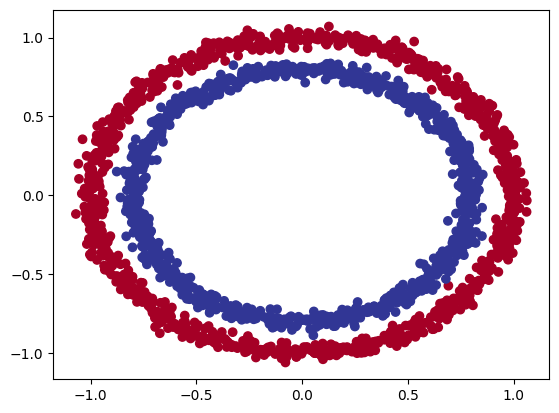

In [ ]:
# Visualize with a plot

import matplotlib.pyplot as plt

plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((2000, 2), (2000,))

### Turn data into tensors and create train and test splits

In [ ]:
import torch
X = torch.tensor(X).type(torch.float) #torch.from_numpy(X).type(torch.float)
y = torch.tensor(y).type(torch.float) #torch.from_numpy(y).type(torch.float)

X[:5], y[:5], X.shape, y.shape

(tensor([[ 0.4711, -0.5816],
         [-0.6170,  0.8082],
         [-0.4000,  0.7080],
         [ 0.8294, -0.6006],
         [-0.1642,  0.7613]]),
 tensor([1., 0., 1., 0., 1.]),
 torch.Size([2000, 2]),
 torch.Size([2000]))

In [ ]:
# Split data into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(1600, 400, 1600, 400)

### Building a model with non-linearity

In [ ]:
# Make device agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
model1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=20),
    nn.ReLU(),
    nn.Linear(in_features=20, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model1

Sequential(
  (0): Linear(in_features=2, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
)

### Training and evaluating the model

In [ ]:
# Setup loss, optimizer and accuracy functions

loss_fn = nn.BCEWithLogitsLoss()
opt_fn = torch.optim.SGD(params=model1.parameters(), lr=0.1)
acc_fn = Accuracy(task="binary", num_classes=1).to(device)

# Fit the model
torch.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 2000

for epoch in range(epochs):

  model1.train()

  y_logits = model1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  train_loss = loss_fn(y_logits, y_train)
  train_acc = acc_fn(y_pred, y_train)

  opt_fn.zero_grad()

  train_loss.backward()

  opt_fn.step()

  ### Testing
  model1.eval()

  with torch.inference_mode():
    test_logits = model1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {train_loss}, Train Acc: {train_acc} | Test Loss: {test_loss}, Test Acc: {test_acc}")

Epoch: 0 | Train Loss: 0.6978424191474915, Train Acc: 0.5018749833106995 | Test Loss: 0.6989986300468445, Test Acc: 0.4925000071525574
Epoch: 100 | Train Loss: 0.6918523907661438, Train Acc: 0.6031249761581421 | Test Loss: 0.6916441917419434, Test Acc: 0.5799999833106995
Epoch: 200 | Train Loss: 0.6896770596504211, Train Acc: 0.6268749833106995 | Test Loss: 0.6892818212509155, Test Acc: 0.6399999856948853
Epoch: 300 | Train Loss: 0.6864607334136963, Train Acc: 0.6399999856948853 | Test Loss: 0.6857803463935852, Test Acc: 0.6675000190734863
Epoch: 400 | Train Loss: 0.6809130311012268, Train Acc: 0.6762499809265137 | Test Loss: 0.6799747943878174, Test Acc: 0.6949999928474426
Epoch: 500 | Train Loss: 0.6704134941101074, Train Acc: 0.8212500214576721 | Test Loss: 0.6694296002388, Test Acc: 0.8399999737739563
Epoch: 600 | Train Loss: 0.6493764519691467, Train Acc: 0.9350000023841858 | Test Loss: 0.6484999060630798, Test Acc: 0.9325000047683716
Epoch: 700 | Train Loss: 0.6066293716430664, T

### Importing helper function

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


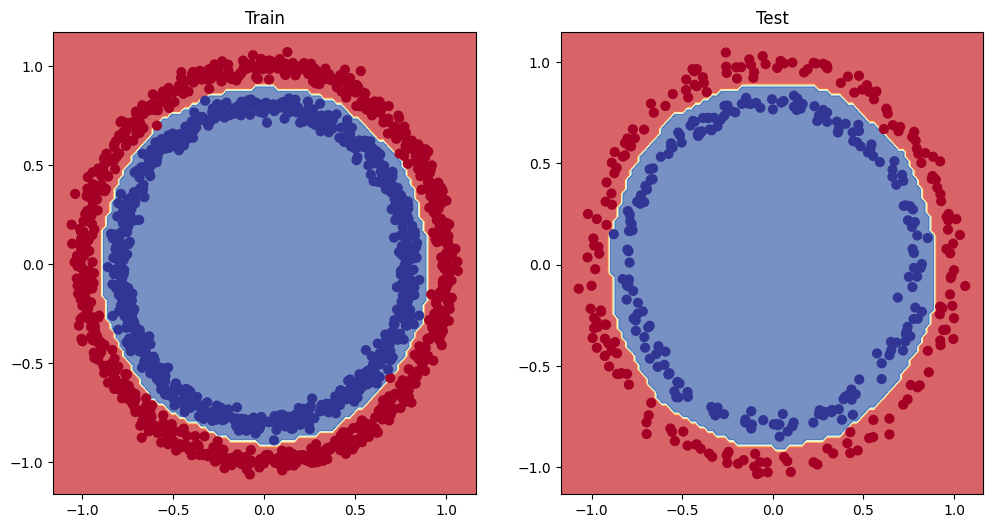

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model1, X_test, y_test)

### Evaluating a model trained with non-linear activation functions

In [ ]:
# Make predictions
model1.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model1(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 1., 0., 1., 0., 1., 0., 0., 1., 1.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 1., 0., 1.]))

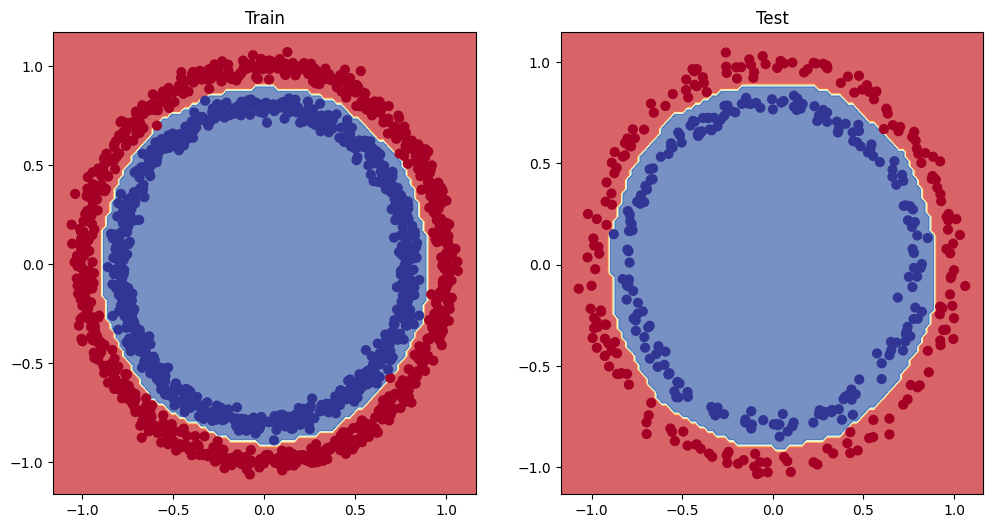

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model1, X_test, y_test)

## Multiclass Classification

### Import libs

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from helper_functions import plot_predictions, plot_decision_boundary

In [ ]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics
    from torchmetrics import Accuracy

### Creating mutli-class classification data

In [ ]:
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)
print(X_blob[:5], y_blob[:5])

[[-8.41339595  6.93516545]
 [-5.76648413 -6.43117072]
 [-6.04213682 -6.76610151]
 [ 3.95083749  0.69840313]
 [ 4.25049181 -0.28154475]] [3 2 2 1 1]


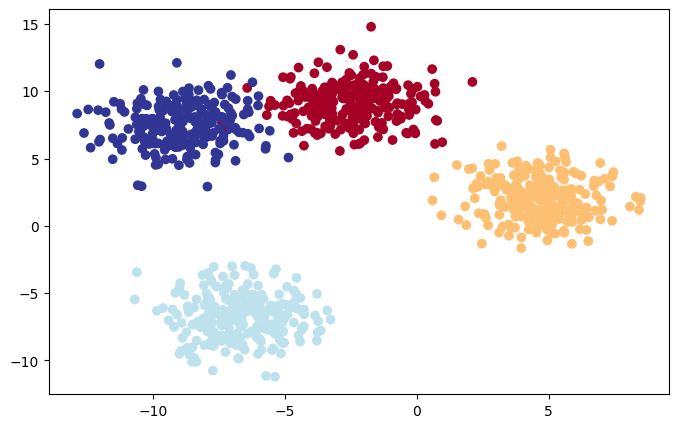

In [ ]:
# convert numpy date into Tensors
X_blob = torch.tensor(X_blob).type(torch.float).squeeze(dim=1)
y_blob = torch.tensor(y_blob).type(torch.LongTensor)

# train and test split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(
    X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

# visualize
plt.figure(figsize=(8, 5))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

### Building a multi-class classification model in PyTorch

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
model2 = nn.Sequential(
            nn.Linear(in_features=2, out_features=8),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=8, out_features=8),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=8, out_features=4), # how many classes are there?
        ).to(device)
model2

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=8, bias=True)
  (2): Linear(in_features=8, out_features=4, bias=True)
)

### Training and evaluating the model


In [ ]:
# Initalize loss, optimizer and accuracy

loss_fn = nn.CrossEntropyLoss()
opt_fn = torch.optim.SGD(params=model2.parameters(), lr=0.1)
acc_fn = Accuracy(task='multiclass', num_classes=4)

torch.manual_seed(42)

epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):

  #Training

  model2.train()

  y_blob_logits = model2(X_blob_train)
  y_blob_pred = torch.softmax(y_blob_logits, dim=1).argmax(dim=1)

  train_loss = loss_fn(y_blob_logits, y_blob_train)
  train_acc = acc_fn(y_blob_pred, y_blob_train)

  opt_fn.zero_grad()

  train_loss.backward()

  opt_fn.step()

  # Evaluating

  model2.eval()

  with torch.inference_mode():
    test_logits = model2(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = acc_fn(test_pred, y_blob_test)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Train Loss: {train_loss}, Train Acc: {train_acc} | Test Loss: {test_loss}, Test Acc: {test_acc}")

Epoch: 0 | Train Loss: 1.0432370901107788, Train Acc: 0.6549999713897705 | Test Loss: 0.5786146521568298, Test Acc: 0.9549999833106995
Epoch: 10 | Train Loss: 0.14397816359996796, Train Acc: 0.9912499785423279 | Test Loss: 0.13037431240081787, Test Acc: 0.9900000095367432
Epoch: 20 | Train Loss: 0.08061709254980087, Train Acc: 0.9912499785423279 | Test Loss: 0.07216107100248337, Test Acc: 0.9950000047683716
Epoch: 30 | Train Loss: 0.05923593044281006, Train Acc: 0.9912499785423279 | Test Loss: 0.05133283510804176, Test Acc: 0.9950000047683716
Epoch: 40 | Train Loss: 0.048919178545475006, Train Acc: 0.9900000095367432 | Test Loss: 0.04098134860396385, Test Acc: 0.9950000047683716
Epoch: 50 | Train Loss: 0.042949628084897995, Train Acc: 0.9900000095367432 | Test Loss: 0.03486066311597824, Test Acc: 0.9950000047683716
Epoch: 60 | Train Loss: 0.03909869119524956, Train Acc: 0.9900000095367432 | Test Loss: 0.030834276229143143, Test Acc: 0.9950000047683716
Epoch: 70 | Train Loss: 0.03642875

### Making and evaluating predictions with a PyTorch multi-class model

In [ ]:
model2.eval()
with torch.inference_mode():
    y_logits = model2(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2891],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5310,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]])

In [ ]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {acc_fn(y_preds, y_blob_test)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 0.9950000047683716%


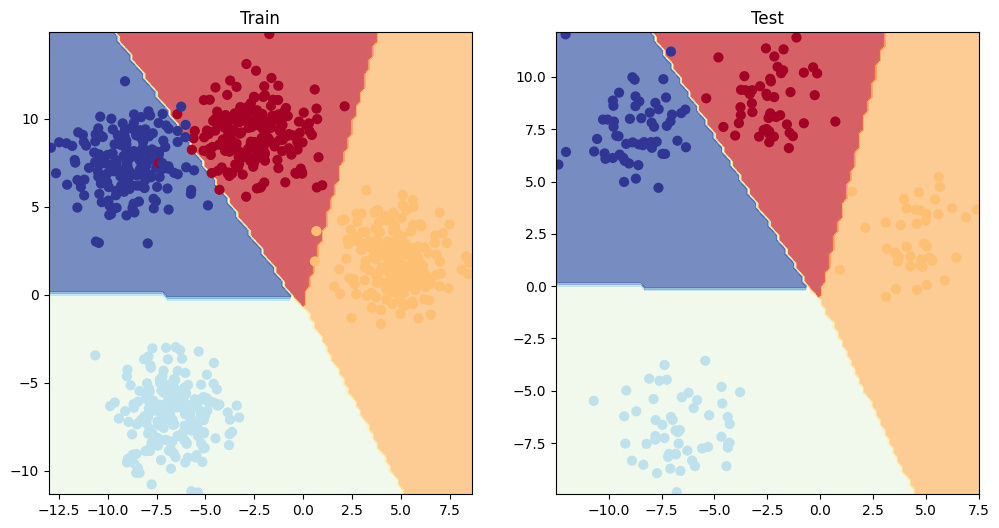

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model2, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model2, X_blob_test, y_blob_test)

## Feedforward Neural Network (FNN)

### Import libs

In [10]:
try:
    import torch
    import torch.nn as nn
    from torchmetrics import Accuracy
    import matplotlib.pyplot as plt
except:
    !pip install -q torch matplotlib torchmetrics torchvision
    import torch
    import torch.nn as nn
    from torchmetrics import Accuracy
    import matplotlib.pyplot as plt

5


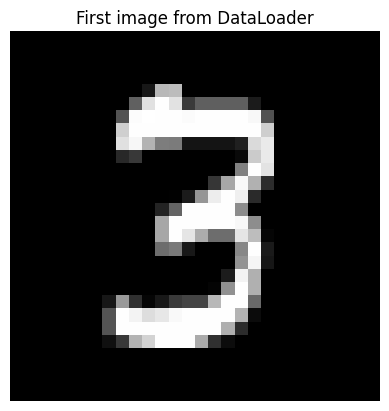

In [11]:
import torchvision.transforms as transforms
import torchvision.datasets as dsets

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

def display_image_torch_dataloader(data_loader: torch.utils.data.DataLoader):
  # Ex: display_image_torch_dataloader(data_loader=train_loader)
  for i, (images, _) in enumerate(data_loader):
    if i == 0:
      break
  plt.imshow(images[0].numpy().squeeze(), cmap='gray')
  plt.title('First image from DataLoader')
  plt.axis('off')  # Hide axes
  plt.show()

display_image_torch_dataloader(data_loader=train_loader)

### Building a FNN model

In [12]:
# Hyperparameters

INPUT_SHAPE=28*28
OUTPUT_SHAPE=10
HIDDEN_LAYERS=3
HIDDEN_LAYER_SHAPE=64

LEARNING_RATE=0.01

class FNNDynamicHiddenLayerModel(nn.Module):
  def __init__(self, input_shape, output_shape, hidden_layers, hidden_layer_shape):
    super().__init__()

    # Initialize the first layer
    self.input_layer = nn.Sequential(
        nn.Linear(input_shape, hidden_layer_shape),
        nn.ReLU()
    )

    # Dynamically add the remaining hidden layers
    for i in range(hidden_layers-1):
        self.input_layer.add_module(f"hidden_layer_{i+1}",
                                nn.Sequential(
                                    nn.Linear(hidden_layer_shape, hidden_layer_shape),
                                    nn.ReLU()
                                ))
    # Final output layer
    self.output_layer = nn.Linear(hidden_layer_shape, output_shape)
    # nn.Sequential(
    #     nn.Linear(hidden_layer_shape, output_shape),
    #     nn.Softmax()

  def forward(self, x):
    x = self.input_layer(x)
    x = self.output_layer(x)
    return x

model = FNNDynamicHiddenLayerModel(INPUT_SHAPE, OUTPUT_SHAPE, HIDDEN_LAYERS, HIDDEN_LAYER_SHAPE)
model

FNNDynamicHiddenLayerModel(
  (input_layer): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (hidden_layer_1): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): ReLU()
    )
    (hidden_layer_2): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): ReLU()
    )
  )
  (output_layer): Linear(in_features=64, out_features=10, bias=True)
)

### Training and evaluating the model


In [39]:
train_features_batch, train_labels_batch = next(iter(train_loader))
train_features_batch.shape, train_labels_batch.shape, train_labels_batch.size(0)

(torch.Size([100, 1, 28, 28]), torch.Size([100]), 100)

In [46]:
def accuracy_fn(y_pred, y_true):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

# Initalize loss, optimizer and accuracy functions

loss_fn = nn.CrossEntropyLoss()
opt_fn = torch.optim.Adam(params=model.parameters(), lr=LEARNING_RATE)
accu_fn = Accuracy(task='multiclass', num_classes=10)

# Train the model
for epoch in range(num_epochs):
  print(f"Epoch: {epoch}\n-------")

  # Training
  train_loss = 0
  train_acc = 0
  train_label_count = 0
  train_correct = 0

  model.train()

  for batch, (train_images, train_labels) in enumerate(train_loader):
    #train_images = train_images.view(-1, INPUT_SHAPE).requires_grad_()
    train_images = train_images.reshape(-1,28*28)
    #print(train_images.shape)
    model.train()
    train_logits = model(train_images)
    loss = loss_fn(train_logits, train_labels)
    train_loss += loss.item()

    # Get the prediction
    _, train_pred = torch.max(train_logits.data, 1)

    # Calculate Train Accurary
    train_label_count += train_labels.size(0)
    train_correct += (train_pred == train_labels).sum()
    train_acc = 100 * train_correct / train_label_count

    opt_fn.zero_grad()
    loss.backward()
    opt_fn.step()

    # if batch % 400 == 0:
    #   print(f"Looked at {batch * len(train_images)}/{len(train_loader.dataset)} samples")

  # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_loader)
    train_acc /= len(train_loader)

  # Testing
  test_loss = 0
  test_acc = 0
  test_label_count = 0
  test_correct = 0

  model.eval()
  with torch.inference_mode():
    for _, (test_images, test_labels) in enumerate(test_loader):
      test_images = test_images.reshape(-1,28*28)
      test_logits = model(test_images)
      test_loss += loss_fn(test_logits, test_labels).item()

      # Get the prediction
      _, test_pred = torch.max(test_logits.data, 1)

      # Calculate Test Accurary
      test_label_count += test_labels.size(0)
      test_correct += (test_pred == test_labels).sum()
      test_acc = 100 * test_correct / test_label_count

    test_loss /= len(test_loader)
    test_acc /= len(test_loader)

  print(f"\nTrain loss: {train_loss:.5f}, Train acc: {train_acc*100:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc*100:.2f}%\n")

Epoch: 0
-------

Train loss: 0.00012, Train acc: 16.15 | Test loss: 0.18443, Test acc: 95.77%

Epoch: 1
-------

Train loss: 0.00015, Train acc: 16.17 | Test loss: 0.12622, Test acc: 96.83%

Epoch: 2
-------

Train loss: 0.00022, Train acc: 16.24 | Test loss: 0.15243, Test acc: 96.59%

Epoch: 3
-------

Train loss: 0.00019, Train acc: 16.28 | Test loss: 0.12479, Test acc: 97.06%

Epoch: 4
-------

Train loss: 0.00006, Train acc: 16.31 | Test loss: 0.12568, Test acc: 97.07%



### Test a raw image

In [47]:
from PIL import Image
import torchvision.transforms as transforms

def evaluate_model(raw_image_path, model, device="cuda"):
    """
    Evaluate the model with a given raw image and return the predicted label.

    Parameters:
    - raw_image_path: Path to the raw image file.
    - model: An instance of the trained FNNDynamicHiddenLayerModel.
    - device: Device to run the model inference on ('cuda' or 'cpu').

    Returns:
    - Predicted label of the input image.
    """
    # Preprocess the image
    preprocess = transforms.Compose([
        transforms.Resize((28, 28)),  # Resize to 64x64
        transforms.ToTensor(),  # Convert to PyTorch tensor
        transforms.Normalize(mean=[0.1307], std=[0.3081])  # Normalize (optional for MNIST-like data)
    ])

    # Load and preprocess the image
    image = Image.open(raw_image_path)
    image_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension

    # Move the image tensor to the correct device
    image_tensor = image_tensor.view(-1, 28*28).to(device)

    # Set the model to evaluation mode
    model.eval()

    # Pass the image through the model
    with torch.no_grad():
        output = model(image_tensor)

    # Find the predicted label
    _, predicted_label = torch.max(output, dim=1)

    return predicted_label.item()


Predicted Label: 1


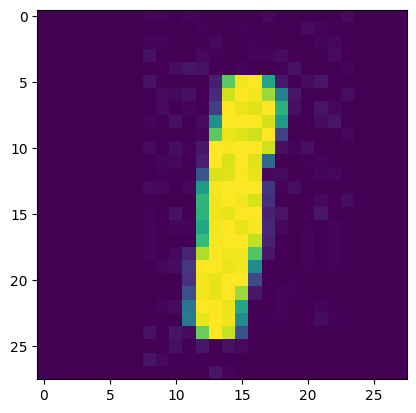

In [79]:
# Download the MNIST jpg files from here https://github.com/teavanist/MNIST-JPG/blob/master/MNIST%20Dataset%20JPG%20format.zip or https://www.kaggle.com/datasets/scolianni/mnistasjpg

raw_image_path = "/content/data/testset/img_10238.jpg"
device = "cuda" if torch.cuda.is_available() else "cpu"
model = FNNDynamicHiddenLayerModel(input_shape=28*28, output_shape=10, hidden_layers=3, hidden_layer_shape=64).to(device)
predicted_label = evaluate_model(raw_image_path, model, device)
print(f"Predicted Label: {predicted_label}")
plt.imshow(Image.open(raw_image_path))
plt.show()

## Convolution Neural Network (CNN)